# Summary

In [42]:
import numpy as np, os
from matplotlib import pyplot as plt
from gmplib.image import fetch_images
images, image_sources = fetch_images(image_paths=['Images'])

In the first of three 2019 lectures on Finsler spacetime, Javaloyes summarizes the Matsumoto metric like this:

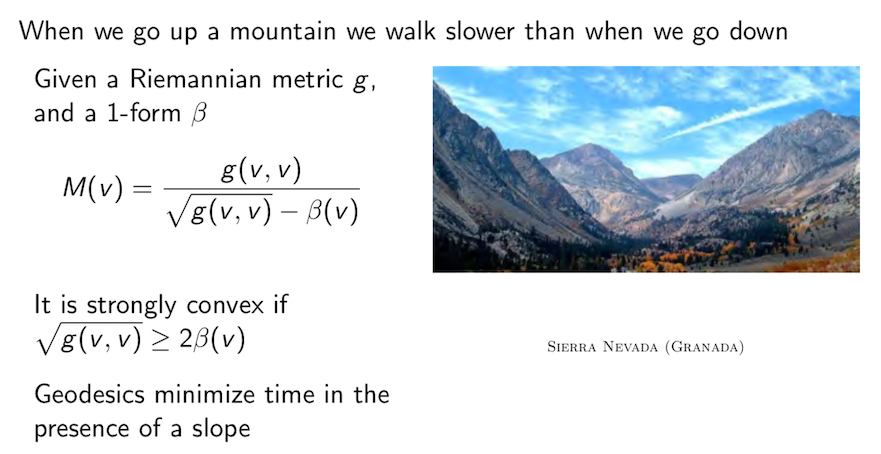

In [43]:
images["Javaloyes_slide30_MatsumotoMetric.png"]

Matsumoto's idea – which was inspired by a question raised by Paul Finsler himself – is to measure how far a mountain hiker will walk in a given direction in unit time *if they maintain the same effort regardless of the local slope*. 

The physics boils down to this:

   - choose a map direction $\phi$ for the hike
   - specify a step interval $\Delta{t} \ll {}$ unit time
   - take a step in the chosen direction with an fixed impulse
   - terminate the step with another fixed impulse
   - choose this impulse pair so that *on a horizontal surface* a constant chosen speed $c$ is maintained
   - on a sloping surface, the speed will be faster or slower than $c$ depending on the tilt
   - include in the termination impulse a lateral component to compensate for any "off-axis" acceleration and to ensure the path continues in the chosen direction
   - keep stepping so that a steady pace is established
   - measure the distance traveled in unit time (ignoring the vagaries of the first few steps)

Horizontal walking speed in the chosen direction is set by two things:

   1. the step-wise accelerations and decelerations induced by the walking impulses
   2. the step-wise accelerations induced by the component of gravity resolved in the walking direction



# Derivation

## Original version: Hiker on a mountain slope

Matsumoto's original paper invokes a hiker who somehow achieves an orientation-dependent "terminal velocity" after a few steps. The physics of this seem a bit vague to me, so in the next section I have adapted it into a more carefully crafted form. First, though, here is the Bao & Robles (2004) version of Matsumoto (1989)

### Preliminaries

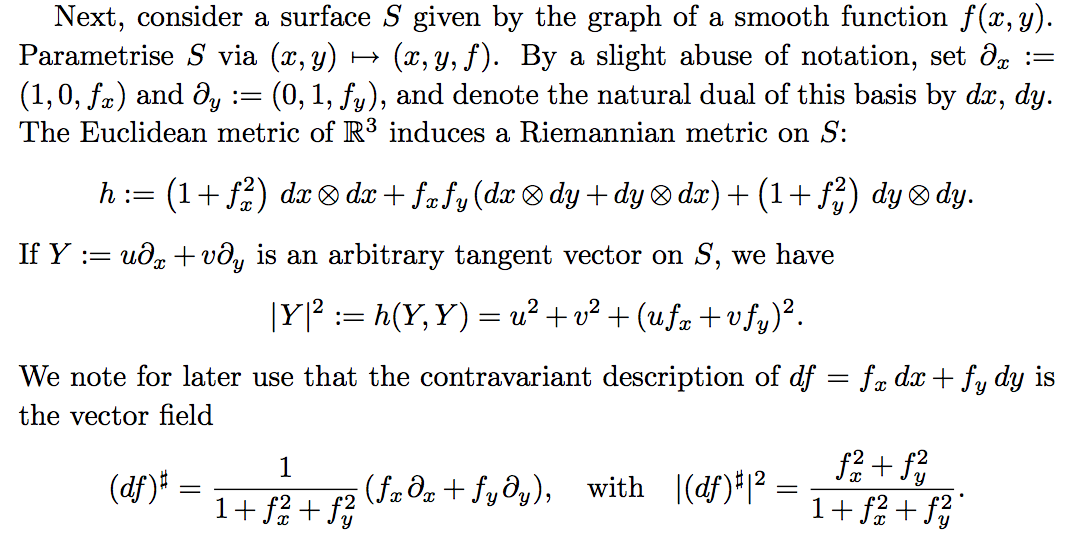

In [29]:
images['Bao_Robles_p201a_hiker.png']

A topographic surface $S$ in 3D space is defined by a function $z=f(x,y)$ and described parametrically by $(x,y,f(x,y))$ [see Matsumoto, 1989, p.22]. 

The tangent plane at ($x$,$y$) has local basis vectors $(1,0,f_x)$ and $(0,1,f_y)$ and these are respectively abusively denoted by $\partial_x$ and $\partial_y$ (abusive, because they not simple derivatives). The dual basis is denoted by $dx, dy$.

We can define a covariant metric tensor $g$ (Bao & Robles denote it as $h$) for this surface using the mutual Euclidean (3D) lengths of the vectors $(1,0,f_x)$ and $(0,1,f_y)$ and the tensor products of the dual basis elements:

\begin{align}
    g
%    :=&  \, \partial_x \otimes \partial_x + \partial_x \otimes \partial_y + \partial_y \otimes \partial_x + \partial_y \otimes \partial_y \\
%    =&
%    \begin{bmatrix}
%    \partial_x & \partial_y
%    \end{bmatrix}
%    \otimes 
%    \begin{bmatrix}
%   \partial_x &  \partial_y
%    \end{bmatrix} 
%    \\
%    =& \,
%    \begin{bmatrix}
%    (1,0,f_x) & (0,1,f_y)
%    \end{bmatrix}
%    \otimes
%    \begin{bmatrix}
%        (1,0,f_x) & (0,1,f_y)
%    \end{bmatrix} \\
%    =& \, 
%    \begin{bmatrix}
%    [(1+f_x^2)\, dx \otimes dx & f_x f_y \, dx \otimes dy] & [f_y f_x \, dy \otimes dx & \, (1+f_y^2) \, dy \otimes dy] 
%    \end{bmatrix}
%    \\
    =& \, 
      \left((1,0,f_x)\cdot(1,0,f_x)\right) \, dx \otimes dx 
    + \left((1,0,f_x)\cdot(0,1,f_y)\right) \, (dx \otimes dy + dy \otimes dx) 
    + \left((0,1,f_y)\cdot(0,1,f_y)\right) \, dy \otimes dy
    \\
    =& \, (1+f_x^2)\, dx \otimes dx + f_x f_y \, (dx \otimes dy + dy \otimes dx) + (1+f_y^2)\, dy \otimes dy
    \\
    =& 
    \begin{bmatrix}
        (1+f_x^2) & f_x f_y  \\
        f_x f_y  & (1+f_y^2)
    \end{bmatrix}
\end{align}


The metric tensor provides a means of measuring the length of a tangent vector $Y := u\partial_x + v\partial_y$ on $S$:

\begin{align}
    \| Y \|_{g}^2
    &= g(Y,Y) = g_{ij} Y^i Y^j\\
    &= 
    \begin{bmatrix}
    u & v
    \end{bmatrix}
    \begin{bmatrix}
        (1+f_x^2) & f_x f_y  \\
        f_y f_x  & (1+f_y^2)
    \end{bmatrix}
    \begin{bmatrix}
    u \\ v
    \end{bmatrix} 
    \\
    &=
    \begin{bmatrix}
    u & v
    \end{bmatrix}
    \begin{bmatrix}
    u(1+f_x^2) + v \,f_x f_y  \\ 
    u \,f_y f_x   + v (1+f_y^2)
    \end{bmatrix} \\
    &= u^2(1+f_x^2) + v uf_x f_y  + u v f_y f_x   + v^2(1+f_y^2)  \\
    &= u^2 + v^2 + u^2 f_x^2  + 2 u v f_x  f_y  + v^2 f_y^2 \\
    &= u^2 + v^2 + (u f_x  +  vf_y)^2
\end{align}


The dual (contravariant) metric tensor is the inverse of $g$
\begin{equation}
    g^{-1}
    =
    \begin{bmatrix}
        (1+f_x^2) & f_x f_y  \\
        f_y f_x  & (1+f_y^2)
    \end{bmatrix}^{-1}
%    =
%    \begin{bmatrix}
%        (1+f_y^2) & -f_x f_y  \\
%        -f_y f_x  & (1+f_x^2)
%    \end{bmatrix}\bigg/((1+f_x^2)(1+f_y^2)-f_x^2 f_y^2)
    =
    \dfrac{1}{1+f_x^2+f_y^2}
    \begin{bmatrix}
        {1+f_y^2}  & -{f_x f_y}  \\
        -{f_y f_x} & {1+f_x^2}
    \end{bmatrix}
\end{equation}

We can also map the covector differential  $df$ to its dual contravariant vector using $g^{-1}$:

\begin{align}
    (df)^{\sharp}  
    & = g^{-1} df\\
    &= 
    \dfrac{
        1
    }{1+f_x^2+f_y^2}
    \begin{bmatrix}
        {1+f_y^2}  & -{f_x f_y}  \\
        -{f_y f_x} & {1+f_x^2}
    \end{bmatrix}
    \begin{bmatrix}
        f_x & f_y
    \end{bmatrix}^T
    \\
    &= 
    \dfrac{1}{1+f_x^2+f_y^2}
    \begin{bmatrix}
    (1+f_y^2)f_x  - {f_x f_y} f_y \\
    -{f_y f_x}f_x + (1+f_x^2)f_y
    \end{bmatrix}
    \\
    &= 
    \dfrac{1}{1+f_x^2+f_y^2}
    \begin{bmatrix}
    f_x \\ f_y
    \end{bmatrix}
    \\
    &= 
    \dfrac{f_x \partial_x + f_y \partial_y}{1+f_x^2+f_y^2}
\end{align}

The length of this vector is

\begin{align}
    \|(df)^{\sharp}\|_g^2
    & = g\left((df)^{\sharp}, (df)^{\sharp}\right) \\
    & = g g^{-1} df\, g^{-1} df \\
    & = df\, g^{-1} \,df \\
    &= 
    \dfrac{1}{1+f_x^2+f_y^2}
    \begin{bmatrix}
    f_x & f_y
    \end{bmatrix}
    \begin{bmatrix}
        (1+f_x^2) & -f_x f_y  \\
        -f_y f_x  & (1+f_y^2)
    \end{bmatrix}
    \begin{bmatrix}
    f_x \\ f_y
    \end{bmatrix} 
    \\
    &=
    \dfrac{1}{1+f_x^2+f_y^2}
    \begin{bmatrix}
    f_x & f_y
    \end{bmatrix}
    \begin{bmatrix}
    f_x(1+f_x^2) - f_y \,f_x f_y  \\ 
    -f_x \,f_y f_x + f_y (1+f_y^2)
    \end{bmatrix} 
    \\
    &=
    \dfrac{1}{1+f_x^2+f_y^2}
    \begin{bmatrix}
    f_x & f_y
    \end{bmatrix}
    \begin{bmatrix}
    f_x  \\ 
    f_y
    \end{bmatrix} 
    \\
    &=
    \dfrac{f_x^2+f_y^2}{1+f_x^2+f_y^2}
\end{align}


### Model

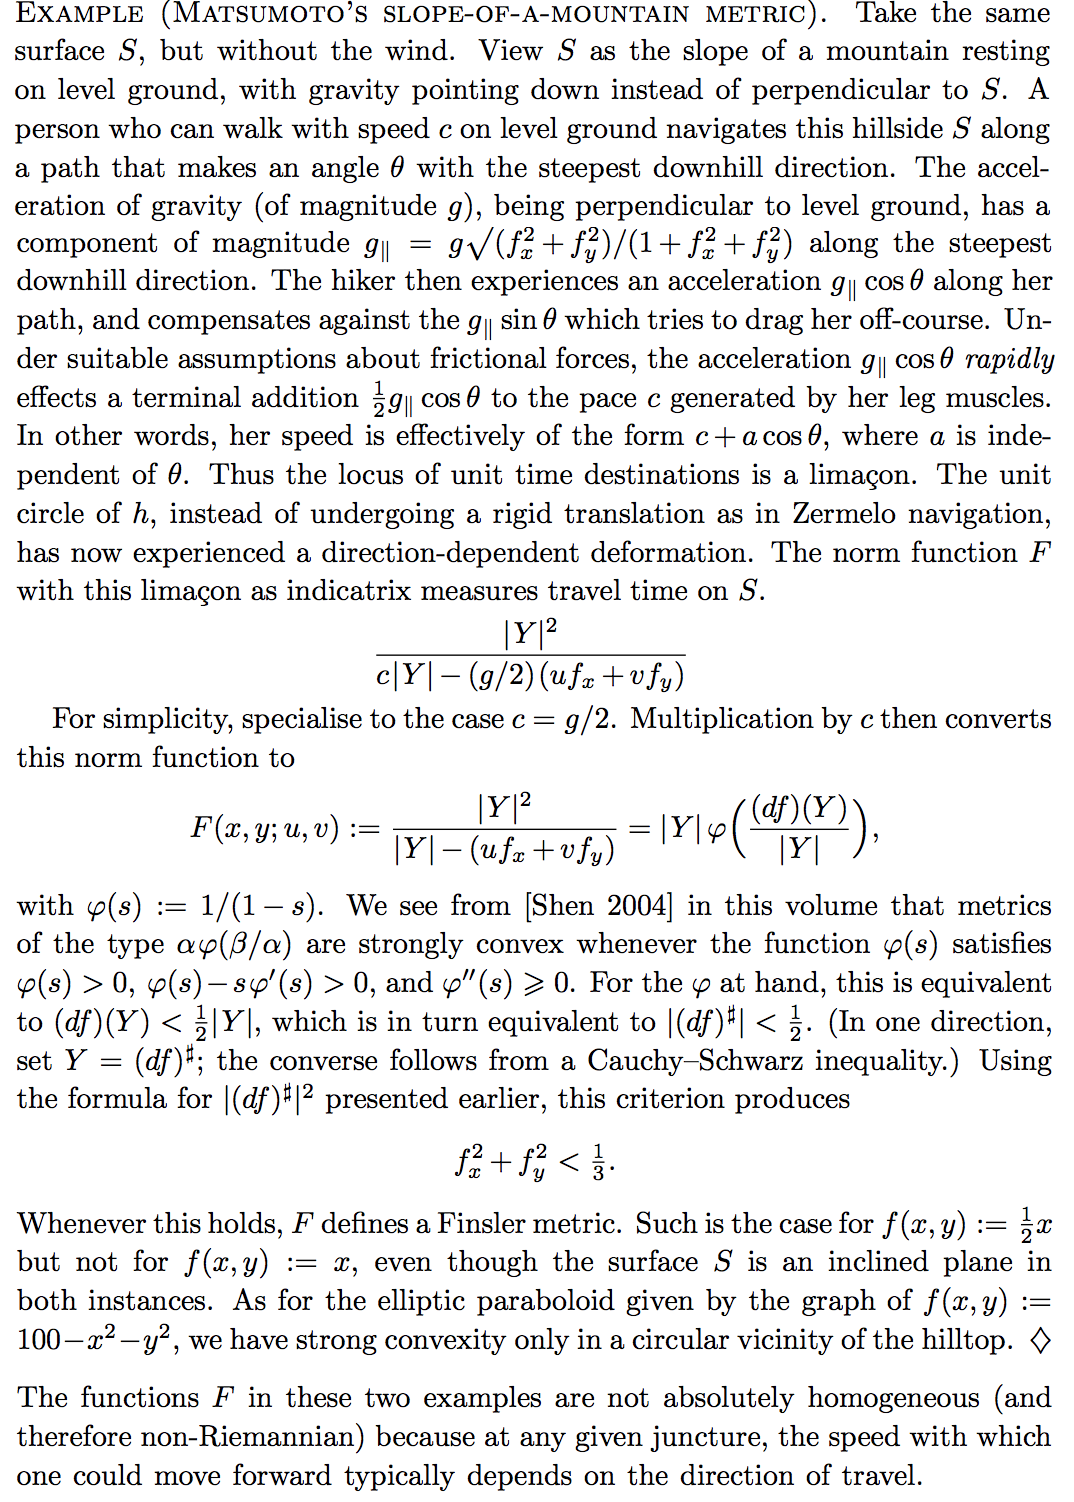

In [30]:
images['Bao_Robles_p201-202_hiker.png']

## Modified version: Robot on a mountain slope

Imagine a bipedal robot walking across a smooth plane inclined towards the south at an angle $\phi$ from the horizontal. Between one step and the next, the robot is surface-parallel accelerated or decelerated depending on the orientation $\theta$ of its motion relative to south. As a step ends, the robot applies just the right impulse through its feet that it: 

   1. compensates for any step-orthogonal motion making it veer away from the intended direction of motion;
   2. recovers the step-wise, surface-parallel speed $c$ as it begins the next step.
   
In this way, it maintains _on average_ a constant step-wise, surface-parallel speed (that may be greater or less than $c$) in the chosen direction of motion.

The question is, how far will it walk in a given direction $\theta$ in a fixed time averaged over many steps?

The incremental distance $\Delta{r}$ traversed between each step interval $\Delta{t}$ will be the result of (a) the speed $v$ asserted when each step is taken, plus (b) the speed boost (or loss) from the component of acceleration due to gravity $g_{\mathrm{acc}}$ acting along the generally non-horizontal path.


\begin{equation}
    \Delta{r} = c\Delta{t} 
        + \tfrac{1}{2} g_{\mathrm{acc}} \Delta{t}^2 \sin\phi\,\cos\theta 
\end{equation}

\begin{equation}
    \dfrac{\Delta{r}}{\Delta{t}}
        = c + \tfrac{1}{2} g_{\mathrm{acc}} \Delta{t} \sin\phi\,\cos\theta 
\end{equation}

So the normalized speed is:

\begin{equation}
    \tilde{c}
        = 1 + a \cos\theta 
\end{equation}

where

\begin{equation}
    a = \dfrac{g_{\mathrm{acc}}\Delta{t}}{2c} \sin\phi
\end{equation}

As the time interval $\Delta{t}$ is reduced (to make motion smoother), $c$ is reduced to ensure $a$ remains constant.

As far as the robot is concerned, assuming it can only sense enough to maintain surface-parallel $v$ at each step, distance appears to vary with orientation. In other words, its distance metric is strongly anisotropic and Finsler: it has a form that cannot be expressed in a simple inner product that applies a metric tensor dependent only on position: if it were, a Riemannian metric would apply. The anisotropy of this metric is encapsulated in its speed-vs-orientation indicatrix, which takes the interesting form of a _limaçon_.

Note that, blithely ignoring units, Bao & Robles assume $c = g_{\mathrm{acc}}/2$ towards the end of their explanation, such that

\begin{equation}
    a = \Delta{t} \sin\phi
\end{equation}

Presumably they also assume $\Delta{t}=1$, and since their $(f_x, f_y)$ is here $(0,\tan\phi)$,

\begin{equation}
    f_y^2 =  \dfrac{1}{1-a^2} - 1 =  \dfrac{a^2}{1-a^2}
\end{equation}

or

\begin{equation}
    a^2 =  1-\dfrac{1}{1+\tan^2\phi}  =  \dfrac{\tan^2\phi}{1+\tan^2\phi} =  \dfrac{f_y^2}{1+f_y^2}
\end{equation}

If $f_x=0$, $f_y^2<\tfrac{1}{3}$, meaning the surface tilt must be less than $\phi < \pi/6$, then

\begin{equation}
    a < \sqrt{\dfrac{1/3}{1+1/3}} = \dfrac{1}{2}
\end{equation}

which means that most of the interesting limaçon-shaped metrics $a\geq 1/2$ are not strongly convex, and thus are not Finsler metrics *sensu stricto*.

Let's simplify the Bao & Robles version of the Matsumoto metric using again the assumption that the surface is planar and tilted only to the south at an angle $f_y = \tan\phi$. Then

\begin{equation}
    |Y|^2 = u^2 + v^2 + v^2 f_y^2 = u^2 + v^2 (1+f_y^2) 
\end{equation}
and

\begin{equation}
    |(df)^\#|^2 = \dfrac{f_y^2}{1+f_y^2}
\end{equation}

which makes the metric function

\begin{equation}
    F = \dfrac{|Y|^2}{|Y|-v f_y} = \dfrac{u^2 + v^2 (1+f_y^2) }{\sqrt{u^2 + v^2 (1+f_y^2)}-v f_y}
\end{equation}

\begin{equation}
    F = \dfrac{|Y|^2}{|Y|-v f_y} = \dfrac{u^2 + v^2 (1+f_y^2) }{\sqrt{u^2 + v^2 (1+f_y^2)}-v f_y}
\end{equation}

## Plots of the indicatrix and figuratrix

In [31]:
def plot_curves(a_list, vs_fn, n_pts):
    theta_array = 2*np.pi*np.linspace(0,1,n_pts)+np.pi/2
    for a_ in a_list:
        vs = vs_fn(a_, theta_array)
        plt.plot(vs*np.cos(theta_array-np.pi/2), 
                 vs*np.sin(theta_array-np.pi/2), 
                 label=f'$a=${a_}')

def plot_indicatrices(a_list1, vs_fn, a_list2=None, title='', n_pts=301):
    plot_curves(a_list1, vs_fn, n_pts)
    axes = plt.gca()
    x_limits = axes.get_xlim()
    y_limits = axes.get_ylim()
    if a_list2 is not None:
        plot_curves(a_list2, vs_fn, n_pts)
    axes.set_xlim(x_limits[0]*1.5, x_limits[1]*1.5)
    axes.set_ylim(*y_limits)
    axes.set_aspect(1)
    plt.grid(True,ls=':')
    plt.legend()
    plt.title(title, va='bottom')

In [32]:
v_relative = lambda a,theta: (1 + a*np.cos(theta))*1
s_relative = lambda a,theta: 1/v_relative(a,theta)

In [33]:
a_list1 = [0,0.25,0.5,0.75,1]
a_list2 = [] #[1.25,1.5]

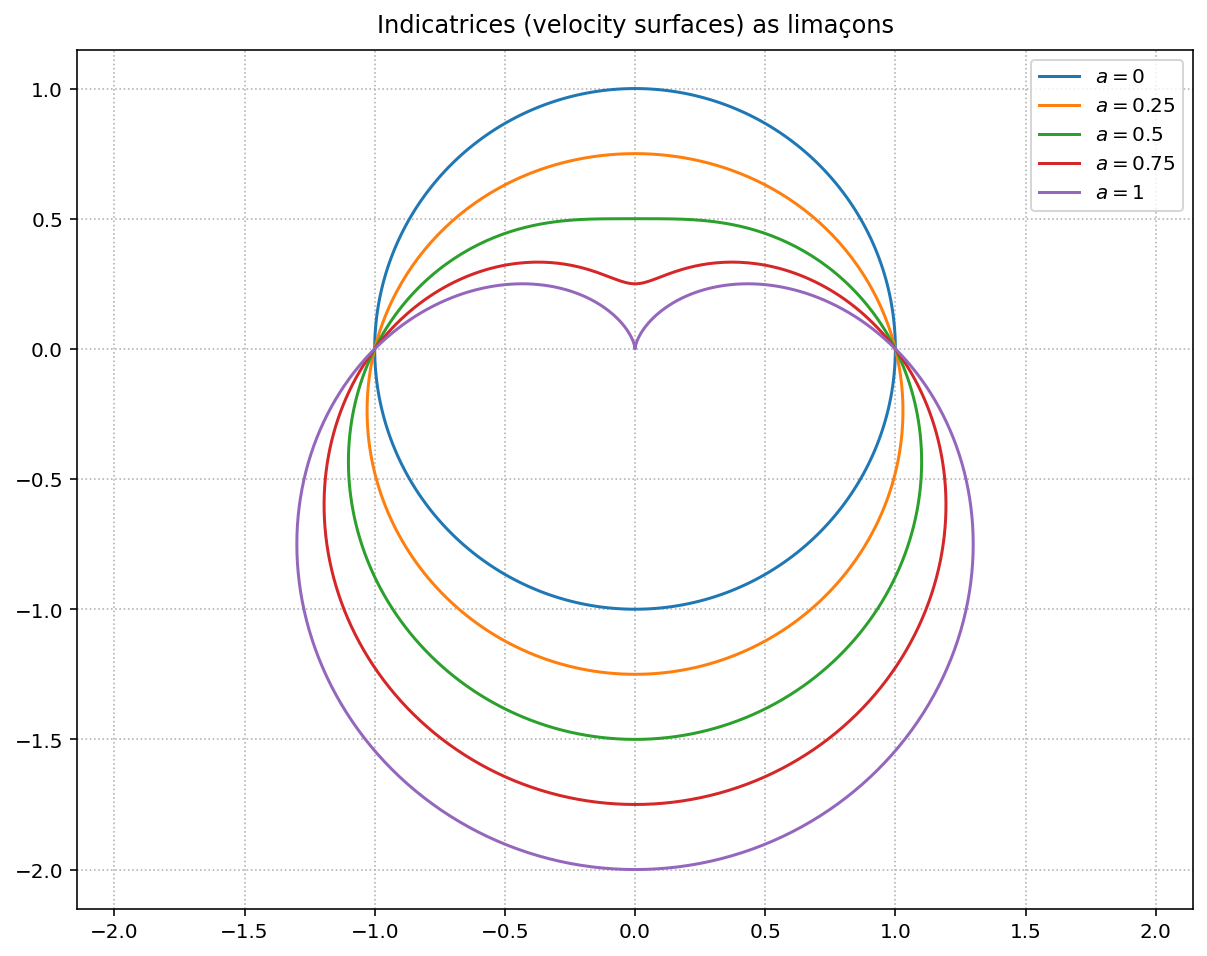

In [34]:
figure = plt.figure(figsize=[10,10])
plot_indicatrices( a_list1+a_list2, v_relative, 
                   title='Indicatrices (velocity surfaces) as limaçons' )

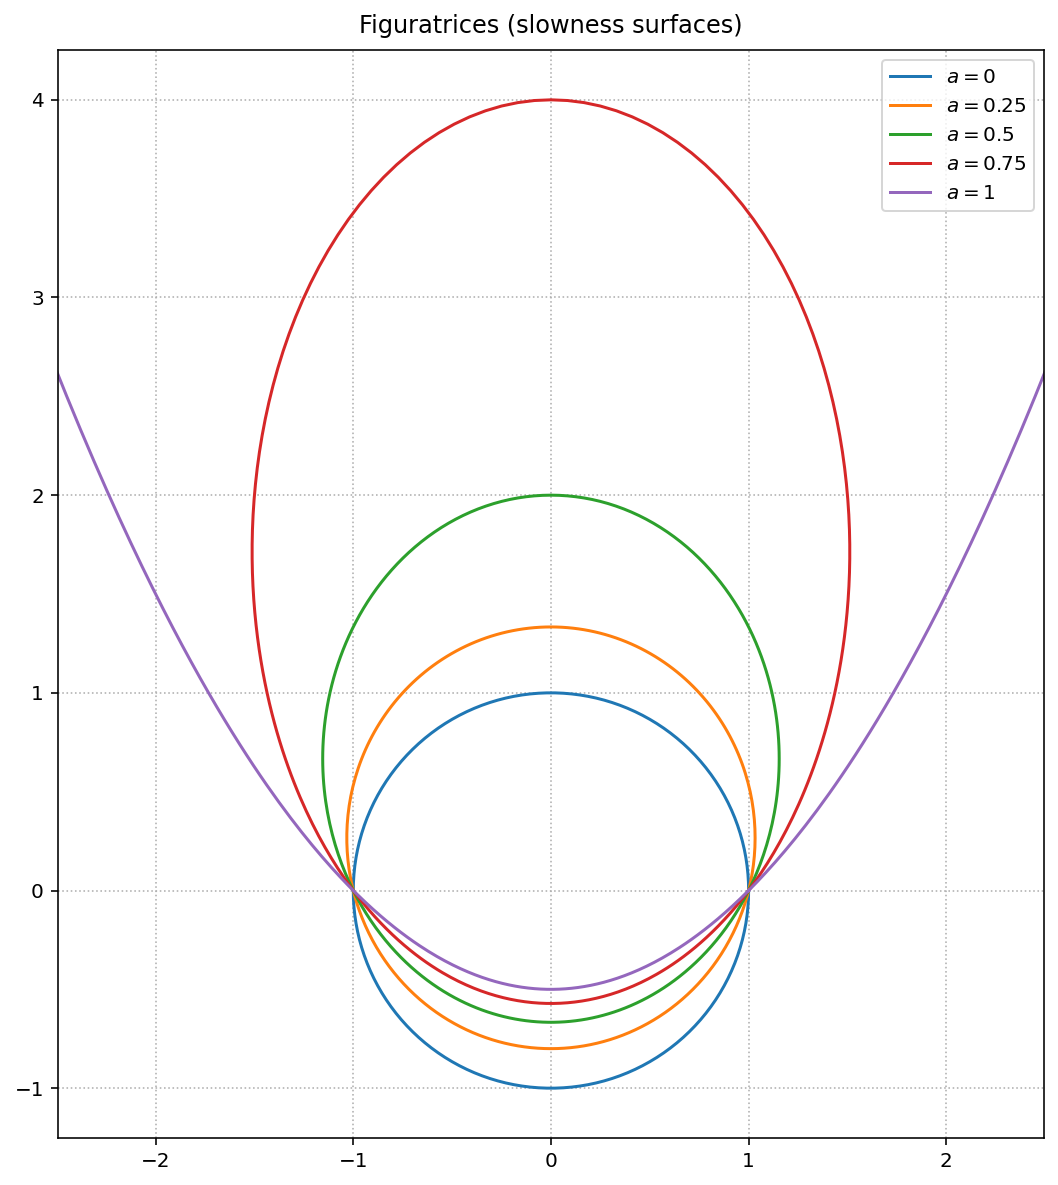

In [35]:
figure = plt.figure(figsize=[10,10])
plot_indicatrices( a_list1[:-1], s_relative, [a_list1[-1]]+a_list2,
                   title='Figuratrices (slowness surfaces)' )

# References

[Antonelli, P. L., Ingarden, R. S., & Matsumoto, M. (1993). The theory of sprays and Finsler spaces with applications in physics and biology. Dordrecht: Springer-Science+Business Media, B.Y.](http://doi.org/10.1007/978-94-015-8194-3) – see pp. 46-48.

[Asanov, G. S. (1985). Finsler Geometry, Relativity and Gauge Theories. Springer Science & Business Media.](http://doi.org/10.1007/978-94-009-5329-1)

[Bao, D., & Robles, C. (2004). Ricci and Flag Curvatures in Finsler Geometry. In D. Bao, R. L. Bryant, S.-S. Chern, & Z. Shen (Eds.), Riemann-Finsler Geometry (Vol. 50, pp. 197–259).](http://library.msri.org/books/Book50/contents.html)

[Gallot, S., Hulin, D., & Lafontaine, J. (2004). Riemannian geometry (3rd ed., pp. 1–337). Springer.](http://doi.org/10.1007/978-3-642-18855-8)

[Hohmann, M., Pfeifer, C., & Voicu, N. (2022). Mathematical foundations for field theories on Finsler spacetimes. Journal of Mathematical Physics, 63(3), 032503–48.](http://doi.org/10.1063/5.0065944)

[Javaloyes, M. Á. (2019). Finsler Geometry: Riemannian foundations and relativistic applications. Lecture 1: Definitions, examples and basic properties (pp. 1–122). Presented at the XXVIII International Fall Workshop on Geometry and Physics ICMAT.](https://www.icmat.es/congresos/2019/IFWGP/program.php)

[Matsumoto, M. (1989). A slope of a mountain is a Finsler surface with respect to a time measure. Journal of Mathematics of Kyoto University, 29(1), 17–25.](http://projecteuclid.org/download/pdf_1/euclid.kjm/1250520303)

# Appendix

For reference, here is the conservative definition of a Finsler metric from Bao & Robles [2004], pp.199-200. It adopts the requirement that the fundamental tensor $g_{ij}$ be positive definite.

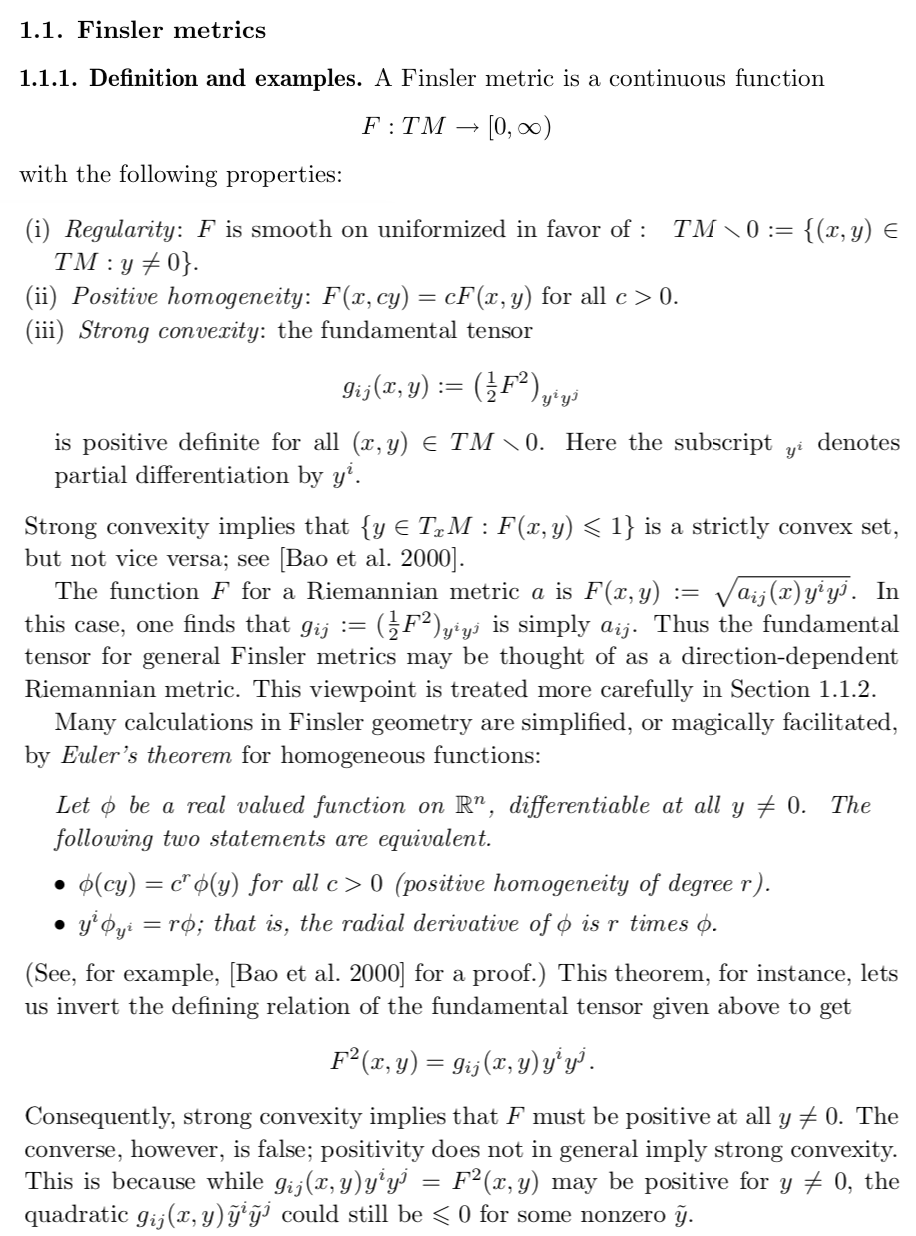

In [36]:
images["Bao_Robles_Finsler_definition.png"]

However, Asanov [1985] is more relaxed, noting that by insisting on positive-definiteness we throw out any GR applications, since pseudo-Riemannian manifolds are not positive definite:

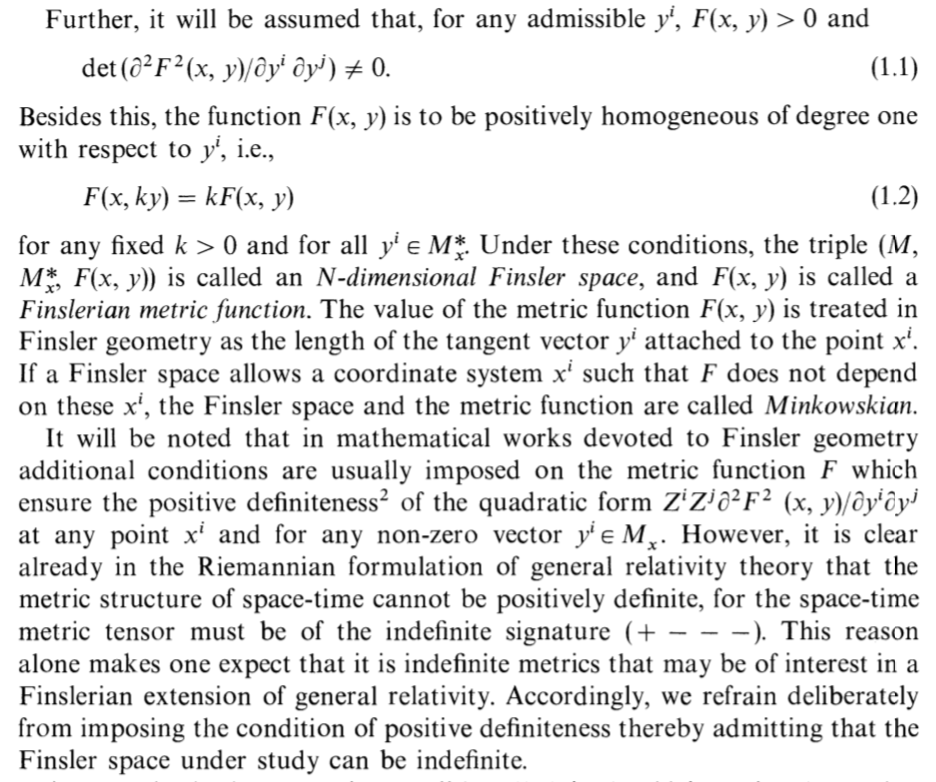

In [37]:
images["Asanov_p21_nonPositiveDefiniteness.png"]

Gallot et al [2004] discuss some of the consequences of allowing for a mixed signature (metric tensor with negative eigenvalues) in the context of Riemannian manifolds (they don't touch on Finsler spaces):

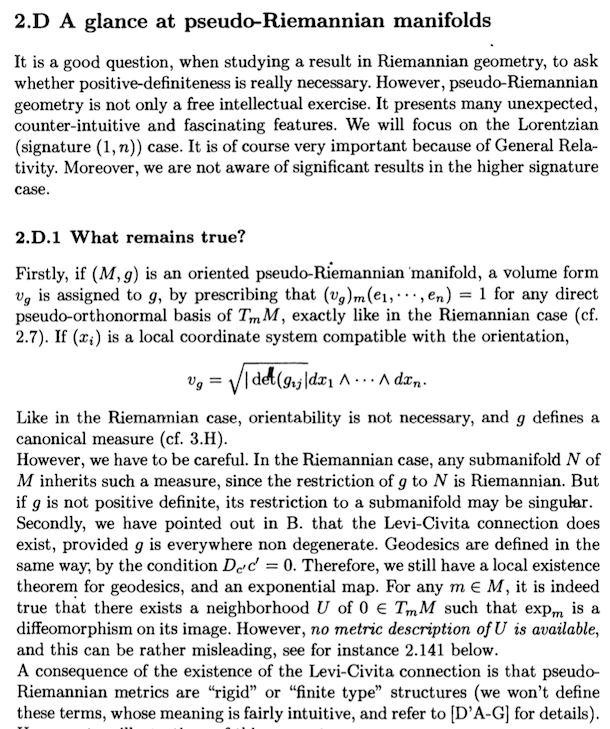

In [38]:
images["Gallot_p115_nonPositiveDefiniteness.png"]

At the risk of terminal obfuscation, here is a very recent paper by Hohmann et al [2022] and their prescription of a Finsler spacetime: note how, echoing Asanov, they require only that the fundamental tensor be non-degenerate. I don't understand how they deal with light-like (null) curves, but that would seem to be precisely where the determinant of $g_{ij}$ is zero...

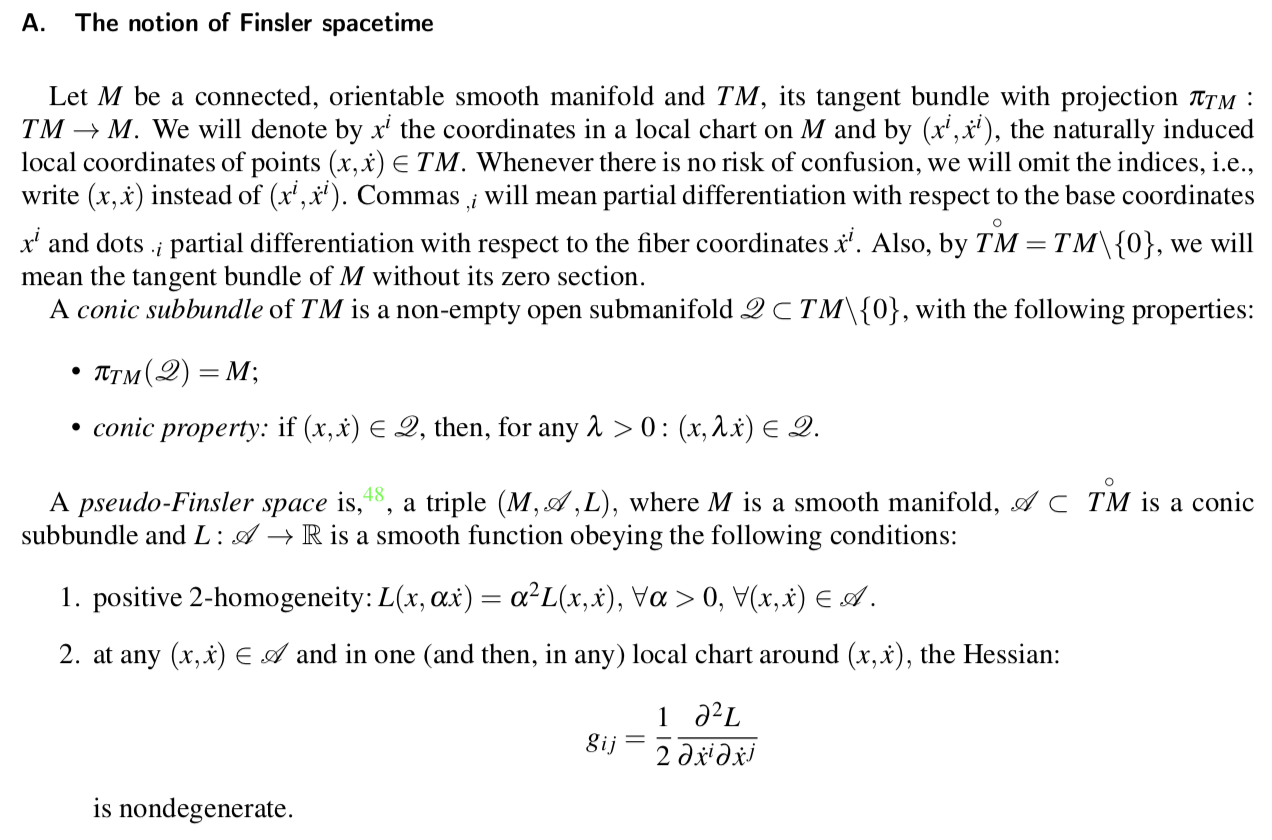

In [39]:
images["Hohmann_p4_Finsler_spacetime.png"]